In [49]:
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from scipy.stats import zscore
from sklearn.preprocessing import Imputer
from sklearn.metrics import accuracy_score
import seaborn as sns

In [50]:
# Numerical libraries
import numpy as np   

from sklearn.model_selection import train_test_split

# Import Linear Regression machine learning library
from sklearn.tree import DecisionTreeRegressor

# to handle data in form of rows and columns 
import pandas as pd    

# importing ploting libraries
import matplotlib.pyplot as plt   

#importing seaborn for statistical plots
import seaborn as sns

In [51]:
Train = pd.read_csv("train.csv")

In [52]:
Train.head()

,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,...,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence,critical_temp
0,4,88.944468,57.862692,66.361592,36.116612,1.181795,1.062396,122.90607,31.794921,51.968828,...,2.257143,2.213364,2.219783,1.368922,1.066221,1,1.085714,0.433013,0.437059,29.0
1,5,92.729214,58.518416,73.132787,36.396602,1.449309,1.057755,122.90607,36.161939,47.094633,...,2.257143,1.888175,2.210679,1.557113,1.047221,2,1.128571,0.632456,0.468606,26.0
2,4,88.944468,57.885242,66.361592,36.122509,1.181795,0.975980,122.90607,35.741099,51.968828,...,2.271429,2.213364,2.232679,1.368922,1.029175,1,1.114286,0.433013,0.444697,19.0
3,4,88.944468,57.873967,66.361592,36.119560,1.181795,1.022291,122.90607,33.768010,51.968828,...,2.264286,2.213364,2.226222,1.368922,1.048834,1,1.100000,0.433013,0.440952,22.0
4,4,88.944468,57.840143,66.361592,36.110716,1.181795,1.129224,122.90607,27.848743,51.968828,...,2.242857,2.213364,2.206963,1.368922,1.096052,1,1.057143,0.433013,0.428809,23.0


In [53]:
Train.tail()

,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,...,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence,critical_temp
21258,4,106.957877,53.095769,82.515384,43.135565,1.177145,1.254119,146.88130,15.504479,65.764081,...,3.555556,3.223710,3.519911,1.377820,0.913658,1,2.168889,0.433013,0.496904,2.44
21259,5,92.266740,49.021367,64.812662,32.867748,1.323287,1.571630,188.38390,7.353333,69.232655,...,2.047619,2.168944,2.038991,1.594167,1.337246,1,0.904762,0.400000,0.212959,122.10
21260,2,99.663190,95.609104,99.433882,95.464320,0.690847,0.530198,13.51362,53.041104,6.756810,...,4.800000,4.472136,4.781762,0.686962,0.450561,1,3.200000,0.500000,0.400000,1.98
21261,2,99.663190,97.095602,99.433882,96.901083,0.690847,0.640883,13.51362,31.115202,6.756810,...,4.690000,4.472136,4.665819,0.686962,0.577601,1,2.210000,0.500000,0.462493,1.84
21262,3,87.468333,86.858500,82.555758,80.458722,1.041270,0.895229,71.75500,43.144000,29.905282,...,4.500000,4.762203,4.242641,1.054920,0.970116,3,1.800000,1.414214,1.500000,12.80


In [54]:
Train.describe()

,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,...,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence,critical_temp
count,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,...,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000
mean,4.115224,87.557631,72.988310,71.290627,58.539916,1.165608,1.063884,115.601251,33.225218,44.391893,...,3.153127,3.056536,3.055885,1.295682,1.052841,2.041010,1.483007,0.839342,0.673987,34.421219
std,1.439295,29.676497,33.490406,31.030272,36.651067,0.364930,0.401423,54.626887,26.967752,20.035430,...,1.191249,1.046257,1.174815,0.393155,0.380291,1.242345,0.978176,0.484676,0.455580,34.254362
min,1.000000,6.941000,6.423452,5.320573,1.960849,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000210
25%,3.000000,72.458076,52.143839,58.041225,35.248990,0.966676,0.775363,78.512902,16.824174,32.890369,...,2.116732,2.279705,2.091251,1.060857,0.775678,1.000000,0.921454,0.451754,0.306892,5.365000
50%,4.000000,84.922750,60.696571,66.361592,39.918385,1.199541,1.146783,122.906070,26.636008,45.123500,...,2.618182,2.615321,2.434057,1.368922,1.166532,2.000000,1.063077,0.800000,0.500000,20.000000
75%,5.000000,100.404410,86.103540,78.116681,73.113234,1.444537,1.359418,154.119320,38.356908,59.322812,...,4.026201,3.727919,3.914868,1.589027,1.330801,3.000000,1.918400,1.200000,1.020436,63.000000
max,9.000000,208.980400,208.980400,208.980400,208.980400,1.983797,1.958203,207.972460,205.589910,101.019700,...,7.000000,7.000000,7.000000,2.141963,1.949739,6.000000,6.992200,3.000000,3.000000,185.000000


In [74]:
# Separating out the features
X = Train.iloc[:, :81]
# Seprating out the target
y = Train.iloc[:,81:]
X.head()

,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,...,mean_Valence,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence
0,4,88.944468,57.862692,66.361592,36.116612,1.181795,1.062396,122.90607,31.794921,51.968828,...,2.25,2.257143,2.213364,2.219783,1.368922,1.066221,1,1.085714,0.433013,0.437059
1,5,92.729214,58.518416,73.132787,36.396602,1.449309,1.057755,122.90607,36.161939,47.094633,...,2.00,2.257143,1.888175,2.210679,1.557113,1.047221,2,1.128571,0.632456,0.468606
2,4,88.944468,57.885242,66.361592,36.122509,1.181795,0.975980,122.90607,35.741099,51.968828,...,2.25,2.271429,2.213364,2.232679,1.368922,1.029175,1,1.114286,0.433013,0.444697
3,4,88.944468,57.873967,66.361592,36.119560,1.181795,1.022291,122.90607,33.768010,51.968828,...,2.25,2.264286,2.213364,2.226222,1.368922,1.048834,1,1.100000,0.433013,0.440952
4,4,88.944468,57.840143,66.361592,36.110716,1.181795,1.129224,122.90607,27.848743,51.968828,...,2.25,2.242857,2.213364,2.206963,1.368922,1.096052,1,1.057143,0.433013,0.428809


In [75]:
from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit_transform(X)
X

C:\ProgramData\Anaconda4\lib\site-packages\sklearn\preprocessing\data.py:617: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda4\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


array([[-0.0800575 ,  0.04673292, -0.45165095, ..., -0.40616628,
        -0.83837245, -0.52006971],
       [ 0.6147436 ,  0.17426938, -0.43207104, ..., -0.36235194,
        -0.42686578, -0.45082134],
       [-0.0800575 ,  0.04673292, -0.45097762, ..., -0.37695672,
        -0.83837245, -0.50330427],
       ...,
       [-1.46965972,  0.40792698,  0.67545689, ...,  1.75534096,
        -0.7001588 , -0.60141582],
       [-1.46965972,  0.40792698,  0.71984372, ...,  0.7432298 ,
        -0.7001588 , -0.46423977],
       [-0.77485861, -0.0030091 ,  0.41416385, ...,  0.32407265,
         1.18612097,  1.81314381]])

In [57]:
#y = Train.loc[:,['critical_temp']].values

In [96]:
from sklearn.decomposition import PCA
pca = PCA(n_components=9)
principalComponents = pca.fit_transform(X)

In [59]:
principalDf.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,-3.623134,0.918981,3.006661,1.777504,0.170117,-0.319618,0.458362,-0.207334,-0.315547,0.214090,0.738692,0.203217
1,-4.497226,-0.216737,1.624215,1.171930,0.870498,-1.149073,-0.263680,0.230473,0.493938,-1.147056,1.158706,0.608152
2,-3.413425,0.996258,3.074811,1.885980,0.198336,-0.363170,0.498312,0.028123,-0.407313,0.172694,0.878811,0.216215
3,-3.516290,0.958295,3.033007,1.832160,0.178799,-0.348817,0.477976,-0.092388,-0.356130,0.192639,0.814647,0.214710
4,-3.746661,0.890584,2.927877,1.698185,0.108606,-0.322588,0.437362,-0.410030,-0.199409,0.256624,0.659442,0.225102


In [77]:
principalComponents

array([[-3.66448679e+00,  9.91642689e-01,  3.04525969e+00, ...,
        -3.56825944e-03,  5.67008489e-03, -4.76409829e-03],
       [-4.55546842e+00, -2.14584743e-01,  1.72287252e+00, ...,
        -6.53683240e-03,  1.73502987e-03, -4.19753977e-03],
       [-3.48817626e+00,  1.05516726e+00,  3.13082075e+00, ...,
        -6.18859381e-03,  4.83194387e-03, -5.47227392e-03],
       ...,
       [ 1.04774618e+01, -9.31942974e-01,  1.57264038e+00, ...,
         3.71928434e-03,  7.78693687e-03,  1.22528699e-03],
       [ 9.77188538e+00, -1.00134503e+00,  1.21560162e+00, ...,
        -5.65490034e-03,  8.24268982e-03,  2.28683104e-03],
       [ 3.91560139e+00,  1.44638502e+00, -1.91616716e+00, ...,
         7.41892080e-03, -1.62427954e-03,  3.21220780e-03]])

In [60]:
pca.explained_variance_

array([3.19755265e+01, 8.52267362e+00, 7.75134560e+00, 6.41441455e+00,
       4.79358382e+00, 3.10338229e+00, 2.93547320e+00, 2.51765864e+00,
       1.91995936e+00, 1.60217408e+00, 1.49675960e+00, 1.18682325e+00,
       9.56268051e-01, 8.16913057e-01, 8.08210486e-01, 6.33184574e-01,
       5.82331859e-01, 4.94846508e-01, 4.08384637e-01, 3.77279012e-01,
       2.82163393e-01, 2.43225559e-01, 2.31389818e-01, 1.84079976e-01,
       1.67676555e-01, 1.52233259e-01, 1.37741352e-01, 1.33707860e-01,
       1.15275610e-01, 1.02297283e-01, 9.28178526e-02, 8.07434419e-02,
       7.77848630e-02, 7.41495097e-02, 5.81381741e-02, 5.54060664e-02,
       4.93137483e-02, 4.62000961e-02, 3.99075044e-02, 3.53853326e-02,
       3.42353366e-02, 2.60593249e-02, 2.47629969e-02, 2.05719243e-02,
       1.91888199e-02, 1.81034104e-02, 1.73984072e-02, 1.59174887e-02,
       1.51657195e-02, 1.46363817e-02, 1.41899147e-02, 1.26650054e-02,
       1.24568782e-02, 1.02621174e-02, 9.55177060e-03, 9.53511168e-03,
      

In [61]:
pca.explained_variance_ratio_.cumsum()

array([0.38992711, 0.49385726, 0.58838142, 0.66660231, 0.7250579 ,
       0.76290225, 0.79869902, 0.82940073, 0.85281376, 0.87235155,
       0.89060386, 0.90507663, 0.91673789, 0.92669978, 0.93655554,
       0.94427694, 0.95137821, 0.95741264, 0.96239271, 0.96699346,
       0.97043431, 0.97340034, 0.97622203, 0.9784668 , 0.98051154,
       0.98236796, 0.98404765, 0.98567816, 0.98708389, 0.98833136,
       0.98946323, 0.99044786, 0.99139641, 0.99230063, 0.9930096 ,
       0.99368526, 0.99428661, 0.99485   , 0.99533666, 0.99576817,
       0.99618565, 0.99650343, 0.99680541, 0.99705627, 0.99729027,
       0.99751103, 0.9977232 , 0.99791731, 0.99810224, 0.99828073,
       0.99845377, 0.99860821, 0.99876012, 0.99888526, 0.99900174,
       0.99911802, 0.99922204, 0.99931008, 0.99939043, 0.99946784,
       0.99953741, 0.99960136, 0.99965746, 0.99970112, 0.99974454,
       0.99978341, 0.99981815, 0.99984964, 0.99987707, 0.99989956,
       0.99991977, 0.99993767, 0.99995414, 0.99996868, 0.99997

In [97]:
from sklearn.tree import DecisionTreeRegressor 
#DecisionTreeClassifier is the corresponding Classifier
DTregressor = DecisionTreeRegressor ()
DTregressor.fit (principalComponents, y)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [98]:
predictValues = DTregressor.predict(principalComponents)
print(predictValues)

[24.43166667 26.5        28.16666667 ...  1.98        1.84
 12.1       ]


In [99]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rms = sqrt(mean_squared_error(y, predictValues))
rms

4.302818789840542

In [88]:
from sklearn.model_selection import train_test_split
#Train and Test splitting of data 
X_train, X_test, y_train, y_test = train_test_split(principalComponents, y, test_size = 0.20, random_state = 3)

In [89]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((17010, 81), (4253, 81), (17010, 1), (4253, 1))

In [90]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score

DT = DecisionTreeRegressor ()
# Your code here
# DTClassifier.fit (# Your code here, # Your code here)
#Hint: 
DT.fit (X_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [91]:
predicted_labels = DT.predict(X_test)
predicted_labels

array([21.24444444, 20.2       , 18.28      , ..., 16.6       ,
       77.        ,  1.13      ])

In [95]:
from sklearn.metrics import mean_squared_error
from math import sqrt

rms = sqrt(mean_squared_error(y_test, predicted_labels))
rms

13.02253687957754

Text(0.5,1,'PCA')

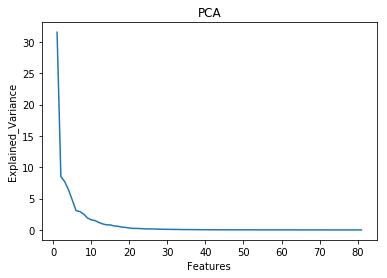

In [94]:
import matplotlib.pyplot as plt
x = range(1,82)
plt.plot(x,pca.explained_variance_)
plt.xlabel("Features")
plt.ylabel("Explained_Variance")
plt.title("PCA")